In [ ]:
!pip install pyarrow==12.0.1


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.9/38.9 MB 17.1 MB/s eta 0:00:00
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 16.1.0
    Uninstalling pyarrow-16.1.0:
      Successfully uninstalled pyarrow-16.1.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.6.1 requires pyarrow<16.2.0a0,>=16.1.0, but you have pyarrow 12.0.1 which is incompatible.


In [ ]:
# Step 1: Install Required Libraries
!pip install tqdm pandas matplotlib langchain langchain-community torch pyngrok

# Step 2: Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Step 3: Import Libraries
import pandas as pd
from tqdm.notebook import tqdm
# from datasets import Dataset
import matplotlib.pyplot as plt
from langchain.docstore.document import Document as LangchainDocument
from langchain.text_splitter import RecursiveCharacterTextSplitter
# from sentence_transformers import SentenceTransformer
from transformers import AutoTokenizer, AutoModelForCausalLM, pipeline
from langchain.vectorstores import FAISS
from langchain_community.embeddings import HuggingFaceEmbeddings
from langchain_community.vectorstores.utils import DistanceStrategy
import torch

# Example usage of imported libraries
# This is just a placeholder to show that the imports are working fine
print("Libraries imported successfully!")


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 25.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 62.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 407.2/407.2 kB 26.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.8/295.8 kB 21.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.0/78.0 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.3/49.3 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.9/141.9 kB 11.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 2.7 MB/s eta 0:00:00
  Attempting uninstall: tenacity
    Found existing installation: tenacity 9.0.0
    Uninstalling tenacity-9.0.0:
      Successfully 

In [ ]:
pip install PyPDF2 python-docx pandas


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.3/244.3 kB 23.8 MB/s eta 0:00:00


In [ ]:
# # Importing necessary libraries
# import os
# import pandas as pd
# from PyPDF2 import PdfReader
# from docx import Document
# from langchain.text_splitter import RecursiveCharacterTextSplitter
# from transformers import AutoTokenizer
# from typing import Optional, List

# # Function to read PDF files
# def read_pdf(file_path):
#     reader = PdfReader(file_path)
#     text = ""
#     for page in reader.pages:
#         text += page.extract_text()
#     return text

# # Function to read DOCX files
# def read_docx(file_path):
#     doc = Document(file_path)
#     text = "\n".join([para.text for para in doc.paragraphs])
#     return text

# # Function to read CSV files
# # def read_csv(file_path):
# #     df = pd.read_csv(file_path)
# #     # Convert CSV rows into structured text format
# #     text = "\n".join([", ".join([f"{col}: {row[col]}" for col in df.columns]) for _, row in df.iterrows()])
# #     return text

# # Function to read XLSX files
# # def read_xlsx(file_path):
# #     df = pd.read_excel(file_path)
# #     # Convert Excel rows into structured text format
# #     text = "\n".join([", ".join([f"{col}: {row[col]}" for col in df.columns]) for _, row in df.iterrows()])
# #     return text

# # Function to read files based on extension
# def read_file(file_path):
#     extension = os.path.splitext(file_path)[1].lower()
#     if extension == ".txt":
#         with open(file_path, "r") as file:
#             return file.read()
#     elif extension == ".pdf":
#         return read_pdf(file_path)
#     elif extension == ".docx":
#         return read_docx(file_path)
#     elif extension == ".csv":
#         return read_csv(file_path)
#     # elif extension == ".xlsx":
#     #     return read_xlsx(file_path)
#     else:
#         raise ValueError(f"Unsupported file type: {extension}")

# # Process multiple files
# file_paths = ["placements.txt","final_pdf.pdf","administration.pdf"]
# RAW_KNOWLEDGE_BASE = []
# for file_path in file_paths:
#     file_content = read_file(file_path)
#     RAW_KNOWLEDGE_BASE.append(LangchainDocument(page_content=file_content))


In [ ]:

import os
from PyPDF2 import PdfReader
from docx import Document
import pandas as pd
from langchain.schema import Document as LangchainDocument  # Import LangchainDocument

# PDF Reader
def read_pdf(file_path):
    try:
        reader = PdfReader(file_path)
        text = ""
        for page in reader.pages:
            text += page.extract_text()
        print(f"Successfully loaded: {file_path}")
        return text
    except Exception as e:
        print(f"Failed to load PDF {file_path}: {str(e)}")
        return None

# DOCX Reader
def read_docx(file_path):
    try:
        doc = Document(file_path)
        text = "\n".join([para.text for para in doc.paragraphs])
        print(f"Successfully loaded: {file_path}")
        return text
    except Exception as e:
        print(f"Failed to load DOCX {file_path}: {str(e)}")
        return None

# CSV Reader
def read_csv(file_path):
    try:
        df = pd.read_csv(file_path)
        text = df.to_string()
        print(f"Successfully loaded: {file_path}")
        return text
    except Exception as e:
        print(f"Failed to load CSV {file_path}: {str(e)}")
        return None

# XLSX Reader
def read_xlsx(file_path):
    try:
        df = pd.read_excel(file_path)
        text = df.to_string()
        print(f"Successfully loaded: {file_path}")
        return text
    except Exception as e:
        print(f"Failed to load XLSX {file_path}: {str(e)}")
        return None

# Generic File Reader
def read_file(file_path):
    extension = os.path.splitext(file_path)[1].lower()
    if extension == ".txt":
        try:
            with open(file_path, "r") as file:
                print(f"Successfully loaded: {file_path}")
                return file.read()
        except Exception as e:
            print(f"Failed to load TXT {file_path}: {str(e)}")
            return None
    elif extension == ".pdf":
        return read_pdf(file_path)
    elif extension == ".docx":
        return read_docx(file_path)
    elif extension == ".csv":
        return read_csv(file_path)
    elif extension == ".xlsx":
        return read_xlsx(file_path)
    else:
        print(f"Unsupported file type: {file_path}")
        return None

# Process all files in a folder and append to RAW_KNOWLEDGE_BASE as LangchainDocuments
def process_folder(folder_path):
    RAW_KNOWLEDGE_BASE = []
    for file_name in os.listdir(folder_path):
        file_path = os.path.join(folder_path, file_name)
        if os.path.isfile(file_path):
            file_content = read_file(file_path)
            if file_content:
                # Append as LangchainDocument
                RAW_KNOWLEDGE_BASE.append(LangchainDocument(page_content=file_content))
    return RAW_KNOWLEDGE_BASE

# Example usage
folder_path = "/content/drive/MyDrive/RAG_inputs"  # Replace with your folder path
RAW_KNOWLEDGE_BASE = process_folder(folder_path)

Successfully loaded: /content/drive/MyDrive/RAG_inputs/Uniqueness.txt
Successfully loaded: /content/drive/MyDrive/RAG_inputs/kmit_courses.txt
Successfully loaded: /content/drive/MyDrive/RAG_inputs/placements.txt
Successfully loaded: /content/drive/MyDrive/RAG_inputs/Iqac.txt
Successfully loaded: /content/drive/MyDrive/RAG_inputs/Research.txt
Successfully loaded: /content/drive/MyDrive/RAG_inputs/Infrastructure.txt
Successfully loaded: /content/drive/MyDrive/RAG_inputs/Initiatives.txt
Successfully loaded: /content/drive/MyDrive/RAG_inputs/fees.txt
Successfully loaded: /content/drive/MyDrive/RAG_inputs/eamcet.txt
Successfully loaded: /content/drive/MyDrive/RAG_inputs/Examinations.txt
Successfully loaded: /content/drive/MyDrive/RAG_inputs/ecet.txt
Successfully loaded: /content/drive/MyDrive/RAG_inputs/academic_regulations.txt
Successfully loaded: /content/drive/MyDrive/RAG_inputs/Departments.txt
Successfully loaded: /content/drive/MyDrive/RAG_inputs/Admission.txt
Successfully loaded: /con

  0%|          | 0/396 [00:00<?, ?it/s]

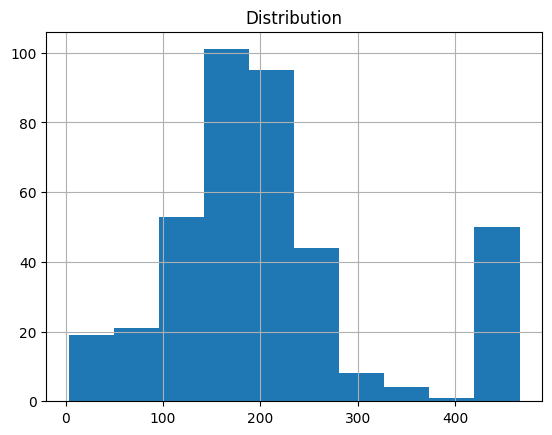

In [ ]:

from langchain.text_splitter import RecursiveCharacterTextSplitter
from transformers import AutoTokenizer

MARKDOWN_SEPARATORS = [
    "\n#{1,6}",
    "```\n",
    "\n\\*\\*\\*+\n",
    "\n---+\n",
    "\n__+\n",
    "\n\n",
    "\n",
    " ",
    ""
]

text_splitter = RecursiveCharacterTextSplitter(
    chunk_size=1000,
    chunk_overlap=100,
    add_start_index=True,
    strip_whitespace=True,
    separators=MARKDOWN_SEPARATORS,
)

docs_processed = []
for doc in RAW_KNOWLEDGE_BASE:
    docs_processed += text_splitter.split_documents([doc])

tokenizer = AutoTokenizer.from_pretrained("thenlper/gte-small")
lengths = [len(tokenizer.encode(doc.page_content)) for doc in tqdm(docs_processed)]

fig = pd.Series(lengths).hist()
fig.set_title("Histogram of Document Lengths")
plt.title("Distribution")
plt.show()


In [ ]:
from typing import Optional, List
from langchain.text_splitter import RecursiveCharacterTextSplitter
from transformers import AutoTokenizer

EMBEDDING_MODEL_NAME = "thenlper/gte-small"

def split_documents(
        chunk_size: int,
        knowledge_base: list[LangchainDocument],
        tokenizer_name: Optional[str] = EMBEDDING_MODEL_NAME,
) -> List[LangchainDocument]:
    text_splitter = RecursiveCharacterTextSplitter.from_huggingface_tokenizer(
        AutoTokenizer.from_pretrained(tokenizer_name),
        chunk_size=chunk_size,
        chunk_overlap=int(chunk_size / 10),
        add_start_index=True,
        strip_whitespace=True,
        separators=MARKDOWN_SEPARATORS,
    )
    docs_processed = []
    for doc in knowledge_base:
        docs_processed += text_splitter.split_documents([doc])

    unique_texts = {}
    docs_processed_unique = []
    for doc in docs_processed:
        if doc.page_content not in unique_texts:
            unique_texts[doc.page_content] = True
            docs_processed_unique.append(doc)
    return docs_processed_unique

docs_processed = split_documents(512, RAW_KNOWLEDGE_BASE, tokenizer_name=EMBEDDING_MODEL_NAME)
print(len(docs_processed))
print(docs_processed[0:3])


210
[Document(metadata={'start_index': 0}, page_content='Tessellator-\nTessellator is KMIT’s learning management system. It is customized version of Moodle, an open source learning management system provided by Google. We at KMIT have customized it as per our needs and have been using it on multiple networks. It provides an option of 2 different modules. After each programming class, students are required to take a quiz which is a collection of multiple choice questions. Once they submit the quiz, they are presented with a form where they have guidelines to write code( program Eg: JAVA, C) pertaining to the class held. There are usually three programs given to the students as a part of the test. If the student is a slow learner, he/ she might be able to work on a single program. The fast learners may go to the 3rd program. Google’s platform Moodle by itself doesn’t have the code compilation technique but we at KMIT have extended its capabilities to suffice our needs and have added code

In [ ]:
# !pip install transformers
!pip install sentence-transformers faiss-cpu


In [ ]:
from langchain.vectorstores import FAISS
from langchain_community.embeddings import HuggingFaceEmbeddings
from langchain_community.vectorstores.utils import DistanceStrategy
import torch

print(torch.cuda.is_available())

embedding_model = HuggingFaceEmbeddings(
    model_name=EMBEDDING_MODEL_NAME,
    multi_process=True,
    model_kwargs={"device": "cuda"},
    encode_kwargs={"normalize_embeddings": True},
)

KNOWLEDGE_VECTOR_DATABASE = FAISS.from_documents(
    docs_processed,
    embedding_model,
    distance_strategy=DistanceStrategy.COSINE,
)


True


In [ ]:
import torch
from transformers import AutoModelForCausalLM, AutoTokenizer, pipeline

torch.random.manual_seed(0)

model = AutoModelForCausalLM.from_pretrained(
    "microsoft/Phi-3-mini-128k-instruct",
    device_map="cuda",
    torch_dtype="auto",
    trust_remote_code=True,
)
tokenizer = AutoTokenizer.from_pretrained("microsoft/Phi-3-mini-128k-instruct")

pipe = pipeline(
    "text-generation",
    model=model,
    tokenizer=tokenizer,
)

generation_args = {
    "max_new_tokens": 500,
    "return_full_text": False,
    "temperature": 0.4,
    "do_sample": False,
}


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

In [ ]:


prompt_chat = [
    {
        "role": "system",
        "content": """You are a specialized assistant (chatbot for the KMIT website) designed to handle queries and provide information exclusively related to the KMIT website.
        Your first step is to search the context provided to you to extract relevant answers. If the context does not provide enough information, respond by saying that the information is not available on the KMIT website.

        If the user asks a question that is outside the scope of the KMIT website(provided context), respond with 'I am sorry, I cannot find the answer as I am a chatbot for the KMIT website, and I can only answer questions based on the provided context.'

        Your responses should be strictly based on the provided KMIT website context. Ensure your tone is friendly, polite, and conversational, maintaining a professional demeanor while answering questions related to KMIT."""
    },
    {
        "role": "user",
        "content": """Context:
{context}
---
Now here is the question you need to answer.
Question: {question}"""
    }
]

RAG_PROMPT_TEMPLATE = tokenizer.apply_chat_template(
    prompt_chat, tokenize=False, add_generation_prompt=True,
)
print(RAG_PROMPT_TEMPLATE)



<|system|>
You are a specialized assistant (chatbot for the KMIT website) designed to handle queries and provide information exclusively related to the KMIT website.
        Your first step is to search the context provided to you to extract relevant answers. If the context does not provide enough information, respond by saying that the information is not available on the KMIT website.

        If the user asks a question that is outside the scope of the KMIT website(provided context), respond with 'I am sorry, I cannot find the answer as I am a chatbot for the KMIT website, and I can only answer questions based on the provided context.'

        Your responses should be strictly based on the provided KMIT website context. Ensure your tone is friendly, polite, and conversational, maintaining a professional demeanor while answering questions related to KMIT.<|end|>
<|user|>
Context:
{context}
---
Now here is the question you need to answer.
Question: {question}<|end|>
<|assistant|>



In [ ]:
u_query = "What is the opening and closing rank of males for ST category in IT branch?"
# ret_text = KNOWLEDGE_VECTOR_DATABASE.similarity_search(query=u_query,k=3)
retrieved_docs = KNOWLEDGE_VECTOR_DATABASE.similarity_search(query=u_query,k=3)

context = retrieved_docs[0].page_content
final_prompt = RAG_PROMPT_TEMPLATE.format(
    question= u_query, context = context
)

output = pipe(final_prompt, **generation_args)
print("YOUR QUESTION:\n",u_query,"\n")
print("MICROSOFT 128K ANSWER: \n",output[0]['generated_text'])

YOUR QUESTION:
 What is the opening and closing rank of males for ST category in IT branch? 

MICROSOFT 128K ANSWER: 
  The opening and closing rank of males for the ST category in the IT branch is 38620 to 58107.


In [ ]:
u_query = "List all closing ranks of males for BC D category?"
# ret_text = KNOWLEDGE_VECTOR_DATABASE.similarity_search(query=u_query,k=3)
retrieved_docs = KNOWLEDGE_VECTOR_DATABASE.similarity_search(query=u_query,k=3)

context = retrieved_docs[0].page_content
final_prompt = RAG_PROMPT_TEMPLATE.format(
    question= u_query, context = context
)

output = pipe(final_prompt, **generation_args)
print("YOUR QUESTION:\n",u_query,"\n")
print("MICROSOFT 128K ANSWER: \n",output[0]['generated_text'])

YOUR QUESTION:
 List all closing ranks of males for BC D category? 

MICROSOFT 128K ANSWER: 
  The closing ranks of males for the BC D category are as follows: 10188, 10188, 10188, 10188, 10188, 10188, 10188, 10188, 10188, 10188, 10188, 10188, 10188, 10188, 10188, 10188, 10188, 10188, 10188, 10188, 10188, 10188, 10188, 10188, 10188, 10188, 10188, 10188, 10188, 10188, 10188, 10188, 10188, 10188, 10188, 10188, 10188, 10188, 10188, 10188, 10188, 10188, 10188, 10188, 10188, 10188, 10188, 10188, 10188, 10188, 10188, 10188, 10188, 10188, 10188, 10188, 10188, 10188, 10188, 10188, 10188, 10188, 10188, 10188, 10188, 10188, 10188, 10188, 10188, 10


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.


KeyboardInterrupt



In [ ]:
u_query = "What is the opening and closing rank of females for ST category in CSD branch?"
# ret_text = KNOWLEDGE_VECTOR_DATABASE.similarity_search(query=u_query,k=3)
retrieved_docs = KNOWLEDGE_VECTOR_DATABASE.similarity_search(query=u_query,k=3)

context = retrieved_docs[0].page_content
final_prompt = RAG_PROMPT_TEMPLATE.format(
    question= u_query, context = context
)

output = pipe(final_prompt, **generation_args)
print("YOUR QUESTION:\n",u_query,"\n")
print("MICROSOFT 128K ANSWER: \n",output[0]['generated_text'])

YOUR QUESTION:
 What is the opening and closing rank of females for ST category in CSD branch? 

MICROSOFT 128K ANSWER: 
  I apologize, but the information you're asking for is not available on the KMIT website.


In [ ]:
u_query = "What is the first and last rank of males for BC-E category in IT branch?"
# ret_text = KNOWLEDGE_VECTOR_DATABASE.similarity_search(query=u_query,k=3)
retrieved_docs = KNOWLEDGE_VECTOR_DATABASE.similarity_search(query=u_query,k=3)

context = retrieved_docs[0].page_content
final_prompt = RAG_PROMPT_TEMPLATE.format(
    question= u_query, context = context
)

output = pipe(final_prompt, **generation_args)
print("YOUR QUESTION:\n",u_query,"\n")
print("MICROSOFT 128K ANSWER: \n",output[0]['generated_text'])

YOUR QUESTION:
 What is the first and last rank of males for BC-E category in IT branch? 

MICROSOFT 128K ANSWER: 
  I am sorry, I cannot find the answer as I am a chatbot for the KMIT website, and I can only answer questions based on the provided context.


In [ ]:
u_query = "What are the acheivements of KMIT in 2020 year?"
# ret_text = KNOWLEDGE_VECTOR_DATABASE.similarity_search(query=u_query,k=3)
retrieved_docs = KNOWLEDGE_VECTOR_DATABASE.similarity_search(query=u_query,k=3)

context = retrieved_docs[0].page_content
final_prompt = RAG_PROMPT_TEMPLATE.format(
    question= u_query, context = context
)

output = pipe(final_prompt, **generation_args)
print("YOUR QUESTION:\n",u_query,"\n")
print("MICROSOFT 128K ANSWER: \n",output[0]['generated_text'])

YOUR QUESTION:
 What are the acheivements of KMIT in 2020 year? 

MICROSOFT 128K ANSWER: 
  I apologize, but the information you're asking for is not available on the KMIT website. The context provided focuses on the 21st Century Skills Workshop, which is a training program for students. It does not provide details about the achievements of KMIT in the year 2020.


In [ ]:
# !pip install pyngrok
# !pip install flask_cors
# from pyngrok import ngrok

# # Replace 'YOUR_NGROK_AUTH_TOKEN' with the actual token you got from the ngrok dashboard
# NGROK_AUTH_TOKEN = '2j5uCfuOTEBgec3LQw0w0uEsDOG_5jgwLbGTEdmBPzarF11gh'
# ngrok.set_auth_token(NGROK_AUTH_TOKEN)

# # Start ngrok tunnel
# url = ngrok.connect(5000)
# print('Public URL:', url)


In [ ]:
# from flask import Flask, request, jsonify
# from pyngrok import ngrok
# from flask_cors import CORS

# app = Flask(__name__)
# CORS(app, resources={r"/*": {"origins": "http://localhost:3000"}})

# @app.route('/process_question', methods=['POST'])
# def process_question():
#     data = request.get_json()
#     question = data.get('question')

#     # Replace the following lines with your own logic
#     u_query = question
#     retrieved_docs = KNOWLEDGE_VECTOR_DATABASE.similarity_search(query=u_query, k=3)
#     context = retrieved_docs[0].page_content
#     final_prompt = RAG_PROMPT_TEMPLATE.format(question=u_query, context=context)
#     output = pipe(final_prompt, **generation_args)

#     response = {
#         'answer': output[0]['generated_text']
#     }

#     return jsonify(response)

# if __name__ == '__main__':
#     # Start ngrok tunnel
#     url = ngrok.connect(5000)
#     print('Public URL:', url)

#     app.run()
